# Capstone Project 1 Final

Lets take a look at our data that we have taken from Kaggle.

## Data Cleaning/Wrangling
First we will start with weather data

### Weather Data Cleanup

In [1]:
import csv
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

weather_data = pd.read_csv('uber-lyft-cab-prices/weather.csv')
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          894 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.3+ KB


Here we see that all columns have the same number of entries except for rain, so we lets take a look at some of the data and see why this may be the case.

In [2]:
weather_data.head(20)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58


There are NaN values in the rain column which most likely means that there was no rain, we can clean up this data and replace all the NaN with 0s.

In [3]:
weather_data['rain'] = weather_data['rain'].fillna(value = 0)
weather_data.info()
weather_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
temp          6276 non-null float64
location      6276 non-null object
clouds        6276 non-null float64
pressure      6276 non-null float64
rain          6276 non-null float64
time_stamp    6276 non-null int64
humidity      6276 non-null float64
wind          6276 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.3+ KB


,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58


The time_stamp column is in epoch form, let's convert it to a readable human form

In [4]:
weather_data['time_stamp'] = pd.to_datetime(weather_data['time_stamp'],unit='s')
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:01,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:01,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:01,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:01,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:01,0.75,11.49


For now the data looks clean in this table so we can move on to our cab data
### Cab Data Cleanup
Quick look to see what we are dealing with

In [5]:
cab_data = pd.read_csv('uber-lyft-cab-prices/cab_rides.csv')
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


From first glance we see that price column has less entries than all other columns

In [6]:
cab_data.head(20)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


Looking at line 18, we see that there is no price. Upon further inspection of the data turns out that all entries with 'Taxi' under the name column will also yield NaN. I will extract all the Taxi data from this dataframe and put it aside.

Quick comments on how taxi fare works in NYC (the approximate area of where we are taking cab data):   
    
    There is a initial charge
    Pricing per kilometer
    Waiting time charge (per hour)

Since we do not have the data for all of these parameters, we will leave it out of this particular study.

In [7]:
taxi_data = cab_data.loc[cab_data['name'] == 'Taxi']
taxi_data = taxi_data.reset_index(drop=True)
taxi_data.head(20)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
1,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
2,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
3,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
4,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
5,3.39,Uber,1543775279908,North Station,Boston University,NaN,1.0,c0bffbdc-9f15-4822-bda5-77d293a8d77e,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
6,3.39,Uber,1544684707241,North Station,Boston University,NaN,1.0,6af89d7d-7c7e-45fe-98c4-3dc432bb29b4,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
7,2.49,Uber,1543443967576,Back Bay,South Station,NaN,1.0,42dd31b8-d488-4de6-8dd1-544d6f943149,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
8,3.07,Uber,1543336943649,North Station,Fenway,NaN,1.0,4b22b1b6-5d22-476c-bcf9-571afb6b5a4b,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
9,1.57,Uber,1544711408474,North End,Theatre District,NaN,1.0,974fd7df-31d1-4f61-9aad-5c3b853a4368,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


In [8]:
clean_cab_data = pd.concat([cab_data, taxi_data, taxi_data]).drop_duplicates(keep=False)
clean_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
distance            637976 non-null float64
cab_type            637976 non-null object
time_stamp          637976 non-null int64
destination         637976 non-null object
source              637976 non-null object
price               637976 non-null float64
surge_multiplier    637976 non-null float64
id                  637976 non-null object
product_id          637976 non-null object
name                637976 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 53.5+ MB


Let's clean up the timestamp similar to weather data.

In [9]:
clean_cab_data['time_stamp'] = pd.to_datetime(clean_cab_data['time_stamp'],unit='ms')
clean_cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


## Data Storytelling

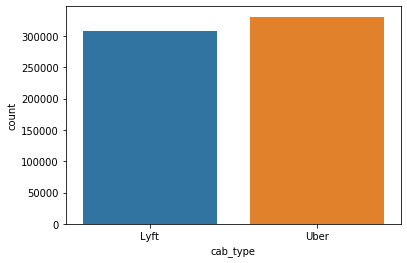

In [10]:
ax = sns.countplot(x='cab_type', data = clean_cab_data)

As we can see the number of each cab_type is almost 50/50 with Uber having a bit more data, but with the high sample size the difference should be negligible.

Before analysing further, we can take a quick look at distance vs pricing to see what we are starting with

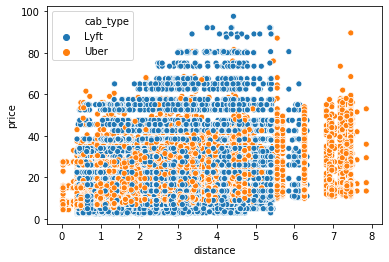

In [11]:
sns.scatterplot(x='distance', y='price', hue='cab_type', data=clean_cab_data)

Based on given chart, seems like Lyft offers lower pricing compared to Uber, but also have higher prices as well. Also interesting to see that when distance is between 6-8 it is all Uber. Let's now check if there are factors, including surge factor, which will affect this chart.
Note, surge factor is an increase in price due to heavy demand of service. In our dataframe, 1 would mean normal price, and everything above would be a multiplier. 

In [12]:
clean_cab_data[clean_cab_data['cab_type'] == 'Lyft'].groupby('surge_multiplier').size()

surge_multiplier
1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
dtype: int64

In [13]:
clean_cab_data[clean_cab_data['cab_type'] == 'Uber'].groupby('surge_multiplier').size()

surge_multiplier
1.0    330568
dtype: int64

Interestingly, only Lyft shows their surge multiplier. Upon further research, Uber has already applied their surge multiplier to their pricing when displayed to their customer, instead of showing the multiplier, like how Lyft does it. We can apply the multiplier only to the Lyft prices and see the true data.

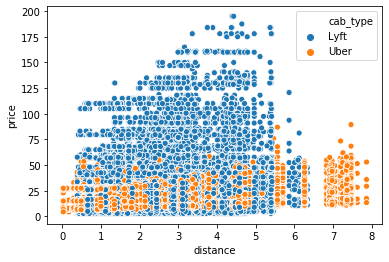

In [14]:
pd.options.mode.chained_assignment = None
true_data = clean_cab_data.copy()

for i in (list(true_data.index.values)):
    if true_data.cab_type[i]=='Uber':
        pass
    elif true_data.cab_type[i]=='Lyft':
        true_data.price[i]= true_data.price[i] * true_data.surge_multiplier[i]
sns.scatterplot(x='distance', y='price', hue='cab_type', data=true_data)

Comparing it to our first chart, Lyft prices go up way higher with the surge multiplier factored into the cost. At this point it seems like Lyft is the more expensive option. Let's explore location and see if that affects pricing.

Split Uber and Lyft to be separate dataframes for comparisons

In [15]:
lyft_data = true_data[true_data.cab_type == "Lyft"]
uber_data = true_data[true_data.cab_type == "Uber"]

Text(0.5, 1.0, 'Lyft')

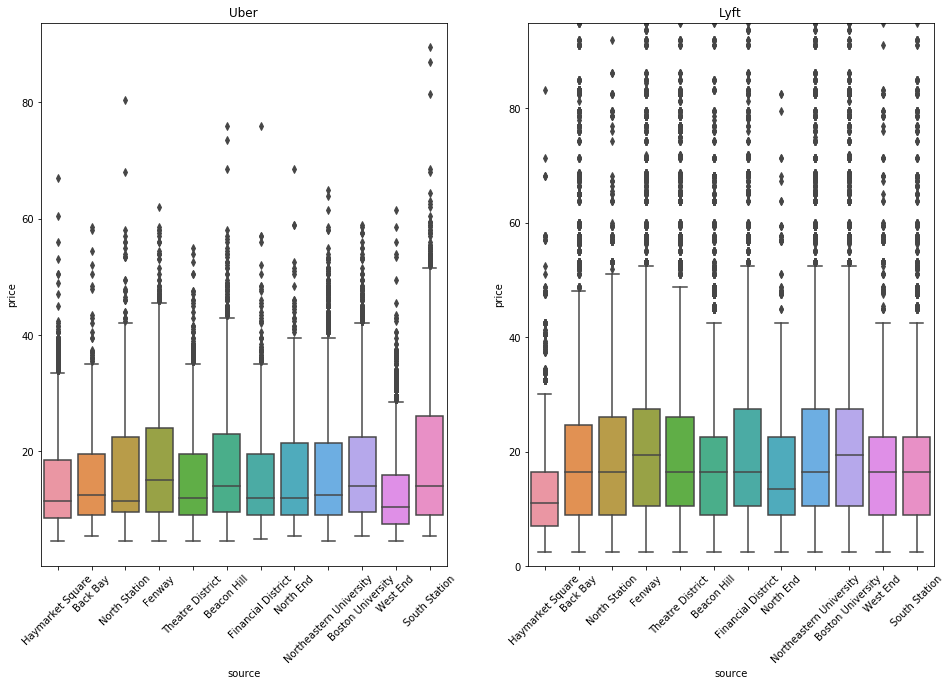

In [16]:
f, axes = plt.subplots(1, 2, figsize=(16,10), sharex=True)
plt.ylim(0,95)
# plt.figure(figsize=(16, 10))
# plt.ylim(0,55)
# source_prices_uber = sns.boxplot("source", "price", data=true_data[true_data['cab_type'] == 'Uber'])
# source_prices_lyft = sns.boxplot("source", "price", data=true_data[true_data['cab_type'] == 'Lyft'])
# source_prices_lyft.set_xticklabels(source_prices.get_xticklabels(), rotation=45)
source_prices_uber = sns.boxplot("source", "price", data=uber_data, ax=axes[0])
source_prices_uber.set_xticklabels(source_prices_uber.get_xticklabels(), rotation=45)

source_prices_lyft = sns.boxplot("source", "price", data=lyft_data, ax=axes[1])
source_prices_lyft.set_xticklabels(source_prices_lyft.get_xticklabels(), rotation=45)
axes[0].set_title('Uber')
axes[1].set_title('Lyft')

Text(0.5, 1.0, 'Lyft')

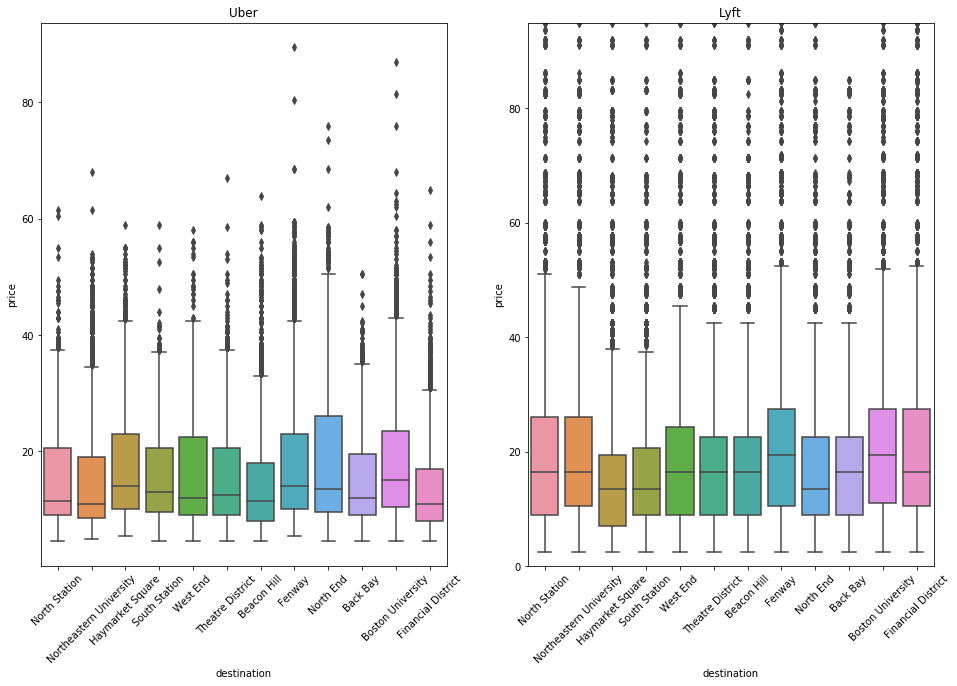

In [17]:
f, axes = plt.subplots(1, 2, figsize=(16,10), sharex=True)
plt.ylim(0,95)
# plt.figure(figsize=(16, 10))
# plt.ylim(0,55)
# source_prices_uber = sns.boxplot("source", "price", data=true_data[true_data['cab_type'] == 'Uber'])
# source_prices_lyft = sns.boxplot("source", "price", data=true_data[true_data['cab_type'] == 'Lyft'])
# source_prices_lyft.set_xticklabels(source_prices.get_xticklabels(), rotation=45)
destination_prices_uber = sns.boxplot("destination", "price", data=uber_data, ax=axes[0])
destination_prices_uber.set_xticklabels(destination_prices_uber.get_xticklabels(), rotation=45)

destination_prices_lyft = sns.boxplot("destination", "price", data=lyft_data, ax=axes[1])
destination_prices_lyft.set_xticklabels(destination_prices_lyft.get_xticklabels(), rotation=45)
axes[0].set_title('Uber')
axes[1].set_title('Lyft')

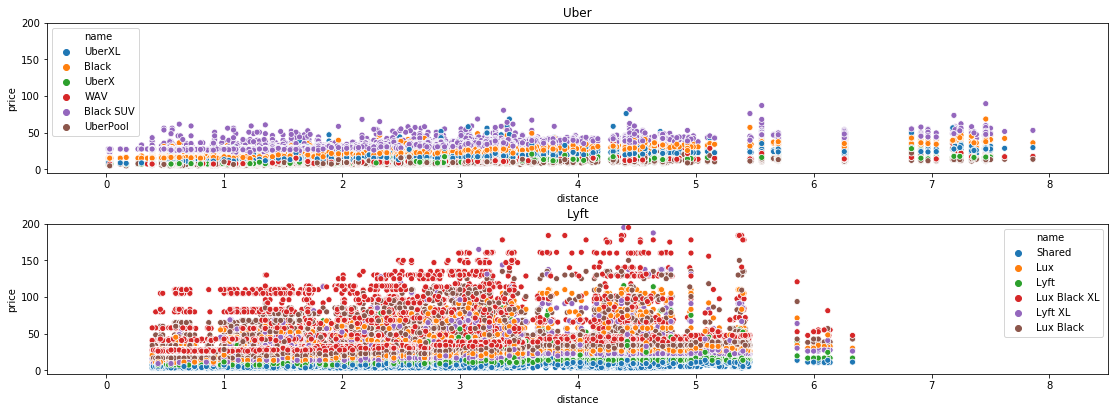

In [18]:
g, axes = plt.subplots (2,1, figsize=(16,6))
g.tight_layout(pad=3.0)

lyft_name=sns.scatterplot(x=lyft_data.distance, y=lyft_data.price, data=lyft_data, hue=lyft_data.name, ax=axes[1])
uber_name=sns.scatterplot(x=uber_data.distance, y=uber_data.price, data=uber_data, hue=uber_data.name, ax=axes[0])

lyft_name.set(xlim=(-0.5, 8.5))
lyft_name.set(ylim=(-5, 200))
uber_name.set(xlim=(-0.5, 8.5))
uber_name.set(ylim=(-5, 200))

axes[1].set_title('Lyft')
axes[0].set_title('Uber')
plt.ioff()

## LYFT
### Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
y = lyft_data.price
#First test we only use distance and surge_multiplier as our only continuous factors
X = lyft_data.loc[:,['distance']]
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245926, 1) (245926,)
(61482, 1) (61482,)


Text(0, 0.5, 'Predictions')

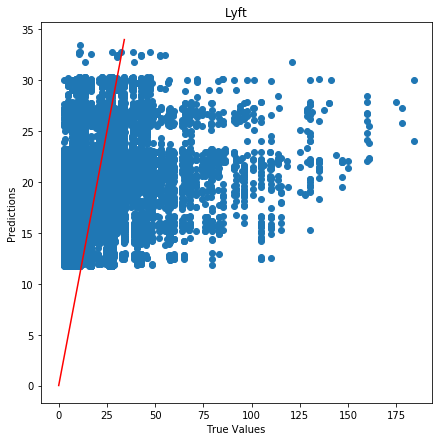

In [20]:
from sklearn import datasets, linear_model
import numpy as np
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
# plt.xticks(np.arange(0, 200, step=25))
# plt.yticks(np.arange(0, 225, step=25))
plt.title('Lyft')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [21]:
print('Score:', model.score(X_test, y_test))

Score: 0.09571355681882665


In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

#Try 5 fold cross validation to see potential variance in our predictions
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.09242405 0.09496105 0.09443755 0.09730579 0.09674657]


Text(0, 0.5, 'Predictions')

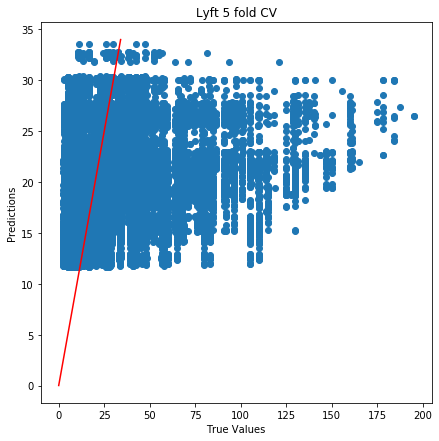

In [23]:
predictions = cross_val_predict(model, X, y, cv=5)
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
plt.title('Lyft 5 fold CV')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [24]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.09518297341864324


### Random Forests - Lyft

In [25]:
from sklearn.ensemble import RandomForestRegressor

#instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [26]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  8.45 degrees.


In [27]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  28.75 %.


In [28]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 1.0


#### Using dummy variables - Lyft

In [29]:
y = lyft_data.price
#Second test we create dummy variables for destination, source, name (product_id is the same as name)
dummied_lyft_data = pd.get_dummies(lyft_data, columns=['destination', 'source'], drop_first=True)
X = dummied_lyft_data.drop(columns=['surge_multiplier', 'price', 'name', 'cab_type','time_stamp', 'id', 'product_id'])
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(245926, 23) (245926,)
(61482, 23) (61482,)


Text(0, 0.5, 'Predictions')

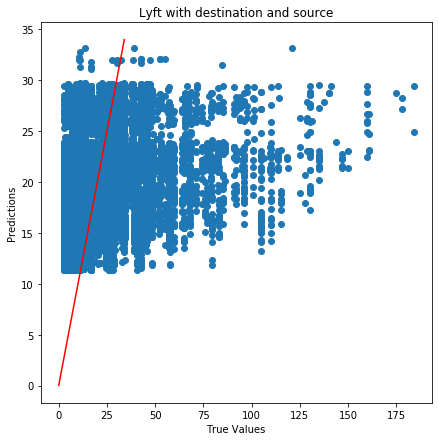

In [30]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
plt.title('Lyft with destination and source')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [31]:
print('Score:', model.score(X_test, y_test))

Score: 0.10168683165668924


With a fit score of exactly 1 this is most likely an overfitted model.

In [32]:
#Try 5 fold cross validation to confirm our findings
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.09778943 0.10019079 0.10019576 0.10310951 0.10102531]


### RF with dummies - Lyft

In [33]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [34]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  8.46 degrees.


In [35]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  28.85 %.


In [36]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 0.87862
Variable: destination_Financial District Importance: 0.01224
Variable: source_Boston University Importance: 0.01208
Variable: source_Northeastern University Importance: 0.01039
Variable: destination_Haymarket Square Importance: 0.00875
Variable: source_North Station Importance: 0.00737
Variable: source_Theatre District Importance: 0.00734
Variable: source_West End      Importance: 0.00689
Variable: source_Fenway        Importance: 0.00687
Variable: destination_North Station Importance: 0.00559
Variable: destination_Boston University Importance: 0.00519
Variable: destination_South Station Importance: 0.00509
Variable: destination_Fenway   Importance: 0.00474
Variable: destination_North End Importance: 0.00474
Variable: source_South Station Importance: 0.00387
Variable: destination_West End Importance: 0.00342
Variable: destination_Theatre District Importance: 0.00336
Variable: destination_Northeastern University Importance: 0.00329
Vari

### UBER
### Linear Regression

In [37]:
y = uber_data.price
#First test we only use distance and surge_multiplier as our only continuous factors
X = uber_data.loc[:,['distance']]
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(264454, 1) (264454,)
(66114, 1) (66114,)


Text(0, 0.5, 'Predictions')

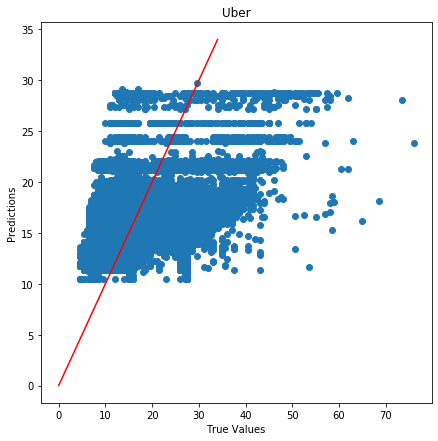

In [38]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
plt.title('Uber')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [39]:
print('Score:', model.score(X_test, y_test))

Score: 0.10985819294871513


In [40]:
#Try 5 fold cross validation to see potential variance in our predictions
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.11508637 0.11607605 0.11216367 0.11169404 0.11003401]


Text(0, 0.5, 'Predictions')

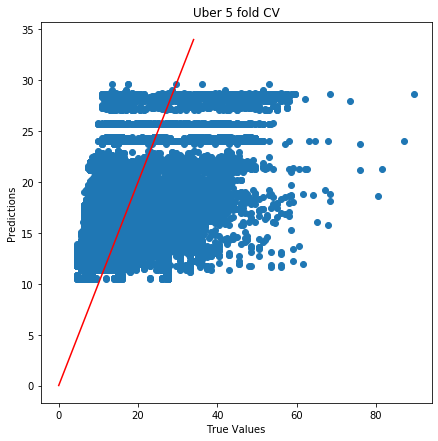

In [41]:
predictions = cross_val_predict(model, X, y, cv=5)
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(y, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
plt.title('Uber 5 fold CV')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [42]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.11302726305689426


### Random Forests - Uber

In [43]:
from sklearn.ensemble import RandomForestRegressor

#instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [44]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

Mean absolute error:  6.71 degrees.


In [45]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  50.42 %.


In [46]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: distance             Importance: 1.0


#### Using dummy variables - Uber

In [47]:
y = uber_data.price
#Second test we create dummy variables for destination, source, name (product_id is the same as name)
dummied_uber_data = pd.get_dummies(uber_data, columns=['destination', 'source'], drop_first=True)
X = dummied_uber_data.drop(columns=['surge_multiplier','price', 'name', 'cab_type','time_stamp', 'id', 'product_id'])
feature_list = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(264454, 23) (264454,)
(66114, 23) (66114,)


Text(0, 0.5, 'Predictions')

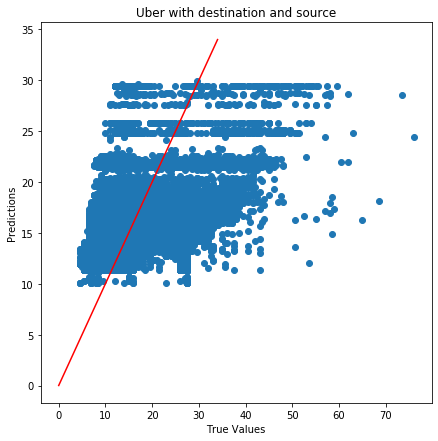

In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, predictions)
x = np.arange(0,35)
plt.plot(x,x, color='red')
plt.title('Uber with destination and source')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [49]:
print('Score:', model.score(X_test, y_test))

Score: 0.11164952921809902


In [50]:
#Try 5 fold cross validation to confirm our findings
scores = cross_val_score(model, X, y, cv=5)
print('CV scores:', scores)

CV scores: [0.11660139 0.11751953 0.11358684 0.11298346 0.11148821]


### RF with dummies - Uber

In [ ]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

#train model
rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

#calculate absolute errors
errors = abs(predictions - y_test)
print('Mean absolute error: ', round(np.mean(errors), 2), 'degrees.')

In [ ]:
#calculate mean absolute percentage error
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

In [ ]:
importances = list(rf.feature_importances_)

feature_importances = [ (feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];